# Обобщение текста

**Задача суммаризации текста** — это процесс автоматического сокращения текста с целью извлечения его ключевых идей и информации. Суммаризация может быть абстрактной (где генерируется новый текст, основанный на исходном) или экстрактивной (где выбираются и комбинируются существующие предложения из оригинала).
Зачем нужна суммаризация текста:
1. Экономия времени: Позволяет быстро получить основную информацию из больших объемов текста без необходимости читать весь материал.
2. Упрощение восприятия: Помогает выделить ключевые моменты, что особенно полезно для сложных или научных текстов.
3. Поддержка принятия решений: В бизнесе и науке краткие резюме помогают быстрее анализировать данные и принимать обоснованные решения.
4. Обработка информации: Полезна для создания аннотаций, рефератов и обзоров, что упрощает работу с большими массивами информации.

Суммаризация текста находит применение в различных областях, включая журналистику, образование, здравоохранение и многое другое.

Сегодня мы попробуем поработать с одной из моделей суммаризации текстов.

**Для начала загрузи модель суммаризации из файла summarization.zip на платформу Kaggle, чтобы она была доступна на платформе**

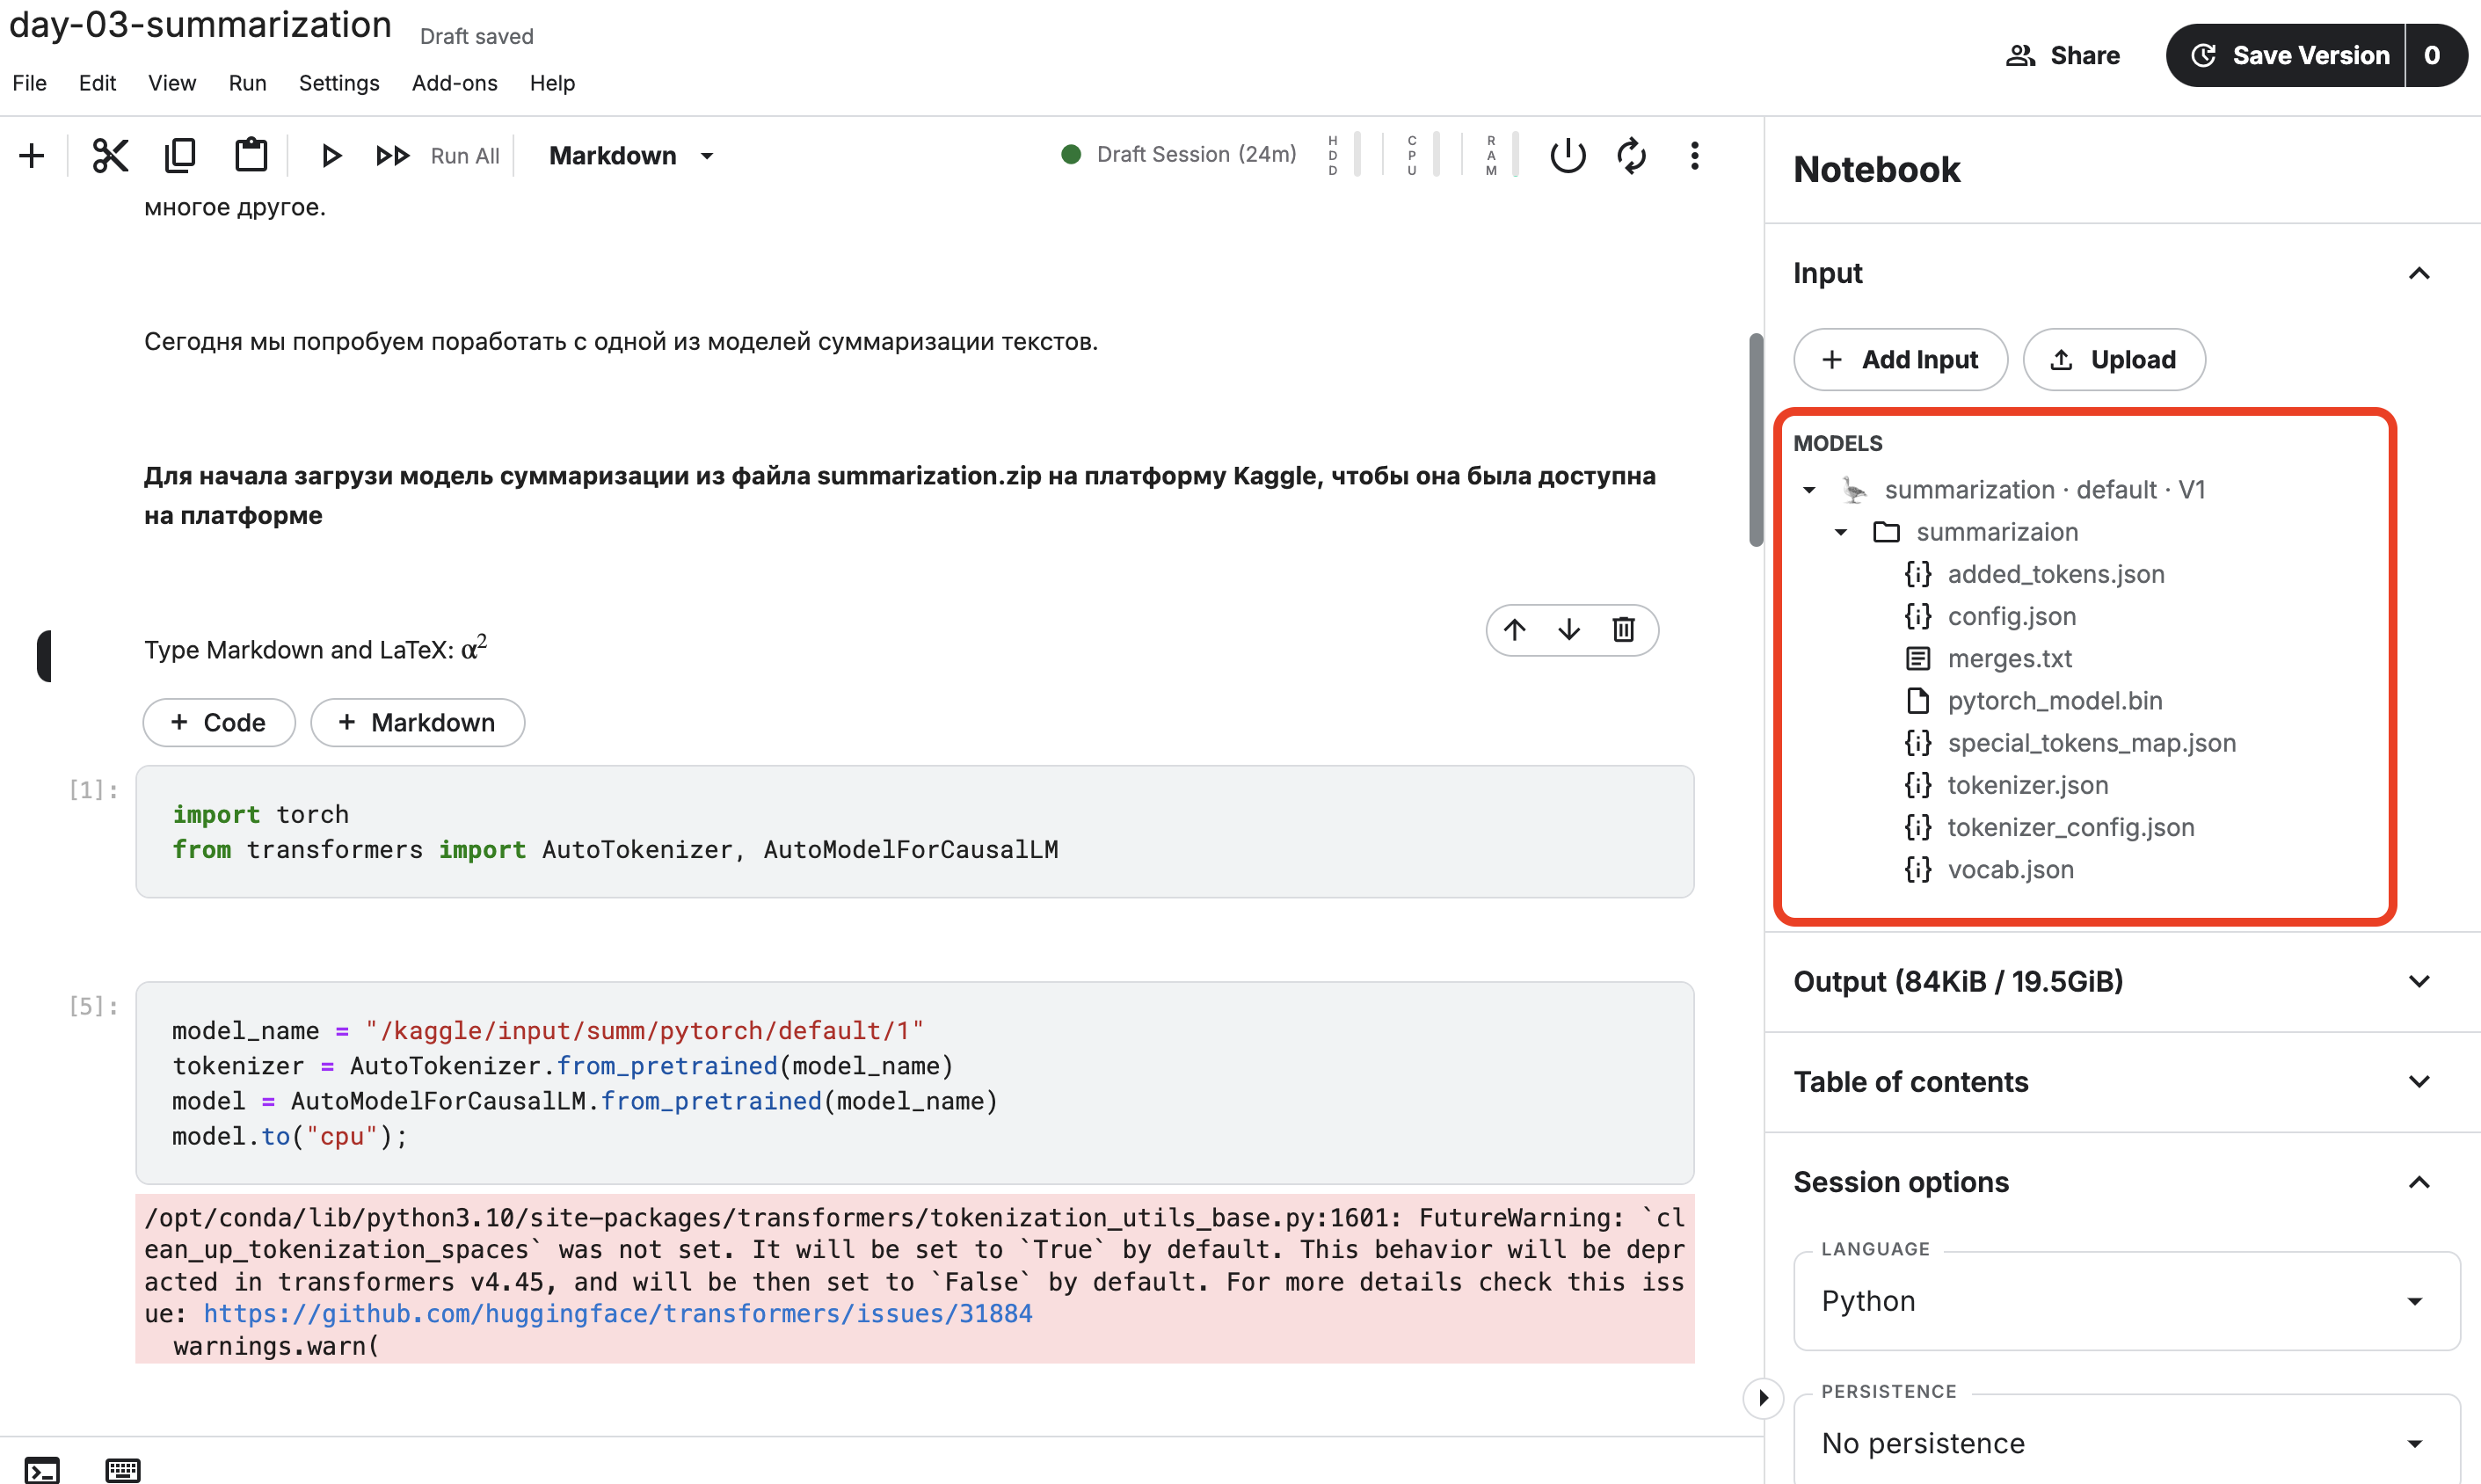

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
model_name = "/kaggle/input/tts/pytorch/default/1/summarizaion/summarizaion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.to("cpu");

2025-04-15 05:00:41.357056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744693241.572132      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744693241.629793      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Эта модель работает следующим образом: получает на вход какой-то текст и выводит общую идею этой статьи.

In [3]:
article_text = "Актуальность проблемы. Электронная информация играет все большую роль во всех сферах жизни современного общества. В последние годы объем научно-технической текстовой информации в электронном виде возрос настолько, что возникает угроза обесценивания этой информации в связи с трудностями поиска необходимых сведений среди множества доступных текстов. Развитие информационных ресурсов Интернет многократно усугубило проблему информационной перегрузки. В этой ситуации особенно актуальными становятся методы автоматизации реферирования текстовой информации, то есть методы получения сжатого представления текстовых документов–рефератов (аннотаций). Постановка проблемы автоматического реферирования текста и, соответственно, попытки ее решения с использованием различных подходов предпринимались многими исследователями."
print(article_text)

Актуальность проблемы. Электронная информация играет все большую роль во всех сферах жизни современного общества. В последние годы объем научно-технической текстовой информации в электронном виде возрос настолько, что возникает угроза обесценивания этой информации в связи с трудностями поиска необходимых сведений среди множества доступных текстов. Развитие информационных ресурсов Интернет многократно усугубило проблему информационной перегрузки. В этой ситуации особенно актуальными становятся методы автоматизации реферирования текстовой информации, то есть методы получения сжатого представления текстовых документов–рефератов (аннотаций). Постановка проблемы автоматического реферирования текста и, соответственно, попытки ее решения с использованием различных подходов предпринимались многими исследователями.


Посмотрим, в чем, по мнению нашей модели, суть этого текста.

In [4]:
text_tokens = tokenizer(
    article_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids]).to("cpu")

In [5]:
output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(f"Обобщение : {summary}")

Обобщение : Электронная информация становится все более значимой в жизни современного общества, и это не может не вызывать озабоченности.


In [6]:
article_text = "Попрыгунья Стрекоза \
Лето красное пропела; \
Оглянуться не успела, \
Как зима катит в глаза. \
Помертвело чисто поле; \
Нет уж дней тех светлых боле, \
Как под каждым ей листком \
Был готов и стол, и дом. \
Все прошло: с зимой холодной \
Нужда, голод настает; \
Стрекоза уж не поет: \
И кому же в ум придет \
На желудок петь голодный! \
Злой тоской удручена, \
К Муравью ползет она: \
«Не оставь меня, кум милый! \
Дай ты мне собраться с силой \
И до вешних только дней \
Прокорми и обогрей!» — \
«Кумушка, мне странно это: \
Да работала ль ты в лето?» — \
Говорит ей Муравей. \
«До того ль, голубчик, было? \
В мягких муравах у нас \
Песни, резвость всякий час, \
Так, что голову вскружило». — \
«А, так ты...» — «Я без души \
Лето целое все пела». — \
«Ты все пела? Это дело: \
Так поди же, попляши!»"


article_text

'Попрыгунья Стрекоза Лето красное пропела; Оглянуться не успела, Как зима катит в глаза. Помертвело чисто поле; Нет уж дней тех светлых боле, Как под каждым ей листком Был готов и стол, и дом. Все прошло: с зимой холодной Нужда, голод настает; Стрекоза уж не поет: И кому же в ум придет На желудок петь голодный! Злой тоской удручена, К Муравью ползет она: «Не оставь меня, кум милый! Дай ты мне собраться с силой И до вешних только дней Прокорми и обогрей!» — «Кумушка, мне странно это: Да работала ль ты в лето?» — Говорит ей Муравей. «До того ль, голубчик, было? В мягких муравах у нас Песни, резвость всякий час, Так, что голову вскружило». — «А, так ты...» — «Я без души Лето целое все пела». — «Ты все пела? Это дело: Так поди же, попляши!»'

In [7]:
text_tokens = tokenizer(
    article_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids]).to("cpu")

In [8]:
output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(summary)

Муравей и Стрекоза, Муравей и Муравей, Стрекоза и Муравей — что общего между этими двумя персонажами из сказки братьев Гримм «Стрекоза и муравей» и чем они друг от друга отличаются?


# Задание 3

1. Попробуй применить нейронную сеть для других текстов. 
2. Посмотри, для каких текстов получилось хорошо, для каких не очень.

In [9]:
biryuk_text = """Вечером рассказчик возвращался с охоты на дрожках — двухместном открытом экипаже, за которыми бежала усталая собака.
В дороге его застала сильная гроза. Спрятавшись от дождя под густым кустом, он дожидался конца ненастья, когда при блеске молний увидел на дороге высокую фигуру.
Это оказался местный лесник. Он отвёз охотника в свой дом — небольшую избушку посреди обширного двора, обнесённого плетнём.
Изба Бирюка состояла из одной комнаты, посреди неё висела люлька с младенцем, которую качала босая девочка лет двенадцати. Охотник понял, что хозяйки в избе не было. Из всех углов смотрела нищета.
Я посмотрел кругом — сердце во мне заныло: не весело войти ночью в мужицкую избу.
Лесник был высокого роста, плечист и хорошо сложен, его суровое и мужественное лицо заросло бородой, из-под широких бровей смело смотрели небольшие карие глаза. 
За угрюмость и нелюдимость окрестные мужики называли лесника Бирюком и боялись, как огня.
Из его леса нельзя было вынести даже вязанки хвороста, а подкупить лесника было невозможно, да и со свету сжить нелегко.
Охотник спросил, где его жена, уж не умерла ли. Бирюк с жестокой улыбкой ответил, что она бросила детей и сбежала с проезжим горожанином. Угостить гостя леснику было нечем: в доме не нашлось ничего, кроме хлеба.
Бирюк ловит браконьера.
Между тем гроза закончилась. Выйдя во двор, Бирюк услышал далёкий стук топора, взял своё ружьё и вместе с охотником отправился туда, где рубили лес.
В конце пути охотник отстал и успел только услышать звуки борьбы и жалобный крик. Он ускорил шаг и вскоре увидел срубленное дерево, возле которого лесник связывал руки браконьеру: тот срубил дерево без разрешения барина.
Охотник сказал, что заплатит за дерево, и попросил отпустить несчастного. Бирюк промолчал.
Бирюк отпускает браконьера
Снова полил дождь. Бирюк, охотник и пленённый браконьер с трудом добрались до избы лесника. Разглядев при свете фонаря испитое, морщинистое лицо и худое тело вора, 
охотник дал себе слово во что бы то ни стало освободить несчастного. Тот стал просить Бирюка отпустить его, жаловался на нищету, голод и жадного приказчика, который разоряет мужиков, но лесник не соглашался.
Вдруг бедняк выпрямился, покраснел от гнева и начал бранить Бирюка.
Ну на, ешь, на, подавись, на, — начал он, прищурив глаза и опустив углы губ, — на, душегубец окаянный: пей христианскую кровь, пей…
Бирюк встал с лавки и шагнул к бедняку. Охотник приготовился защищать его, но тут лесник схватил мужика, одним движением освободил ему руки, 
нахлобучил на голову шапку и вытолкнул из избы, велев убираться к чёрту и в другой раз не попадаться. Удивлённый охотник понял, что на самом деле Бирюк — славный малый.
Лесник вывел охотника из леса и через полчаса простился с ним на опушке."""


biryuk_text

'Вечером рассказчик возвращался с охоты на дрожках — двухместном открытом экипаже, за которыми бежала усталая собака.\nВ дороге его застала сильная гроза. Спрятавшись от дождя под густым кустом, он дожидался конца ненастья, когда при блеске молний увидел на дороге высокую фигуру.\nЭто оказался местный лесник. Он отвёз охотника в свой дом — небольшую избушку посреди обширного двора, обнесённого плетнём.\nИзба Бирюка состояла из одной комнаты, посреди неё висела люлька с младенцем, которую качала босая девочка лет двенадцати. Охотник понял, что хозяйки в избе не было. Из всех углов смотрела нищета.\nЯ посмотрел кругом — сердце во мне заныло: не весело войти ночью в мужицкую избу.\nЛесник был высокого роста, плечист и хорошо сложен, его суровое и мужественное лицо заросло бородой, из-под широких бровей смело смотрели небольшие карие глаза. \nЗа угрюмость и нелюдимость окрестные мужики называли лесника Бирюком и боялись, как огня.\nИз его леса нельзя было вынести даже вязанки хвороста, а п

In [10]:
text_tokens = tokenizer(
    biryuk_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids]).to("cpu")

In [11]:
output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(summary)

Лесник Бирюк и его плененный браконьер рассказали «Газете.Ru» о том, как они ловили браконьера, а также о том, что им пришлось пережить в доме лесника.


In [12]:
vedma_i_osel_text = """ 
В детстве цыганка мне одна предсказала будто я,если сильно полюблю, то любимого сгублю, что измены не прощу и жестоко отомщу и не специально, но со зла превращу его в осла. Он очень милым парнем был, но зачем он изменил? И тогда всё началось, предсказание сбылось,и внезапно над собой потеряла я контроль и несчастный стал стонать,серой шерстью обрастать. Ведьма я, эх, ведьма я, такая вот нелёгкая судьба моя, силой я наделена,но на беду любовь моя обречена.    И мой любимый навсегда жить остался у меня. И за мною по пятам он ходил и тут и там. Замечала я порой, как страдает милый мой, и жалела я осла - на лугу его пасла. Я всё хотела как-нибудь облик милого вернуть, я старалась, как могла, но ничем не помогла. Он копытками стучал, по ослиному кричал, и хвостом своим вертел, еловеком быть хотел. Лишь понял он, что обречён до заката своих дней быть страдающим ослом под опекою моей, и в итоге, наконец, он приблизил свой конец: что-то выпил, что-то съел, и бедняга околел.
"""


vedma_i_osel_text

' \nВ детстве цыганка мне одна предсказала будто я,если сильно полюблю, то любимого сгублю, что измены не прощу и жестоко отомщу и не специально, но со зла превращу его в осла. Он очень милым парнем был, но зачем он изменил? И тогда всё началось, предсказание сбылось,и внезапно над собой потеряла я контроль и несчастный стал стонать,серой шерстью обрастать. Ведьма я, эх, ведьма я, такая вот нелёгкая судьба моя, силой я наделена,но на беду любовь моя обречена.    И мой любимый навсегда жить остался у меня. И за мною по пятам он ходил и тут и там. Замечала я порой, как страдает милый мой, и жалела я осла - на лугу его пасла. Я всё хотела как-нибудь облик милого вернуть, я старалась, как могла, но ничем не помогла. Он копытками стучал, по ослиному кричал, и хвостом своим вертел, еловеком быть хотел. Лишь понял он, что обречён до заката своих дней быть страдающим ослом под опекою моей, и в итоге, наконец, он приблизил свой конец: что-то выпил, что-то съел, и бедняга околел.\n'

In [13]:
text_tokens = tokenizer(
    vedma_i_osel_text,
    max_length=600,
    add_special_tokens=False, 
    padding=False,
    truncation=True
)["input_ids"]
input_ids = text_tokens + [tokenizer.sep_token_id]
input_ids = torch.LongTensor([input_ids]).to("cpu")

In [14]:
output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)

summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
summary = summary.split(tokenizer.sep_token)[1]
summary = summary.split(tokenizer.eos_token)[0]
print(summary)

Цыганка мне однажды напророчила, что я, если сильно полюблю, то любимого загублю, а потом жестоко отомщу.
